In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pickle
import os

path = os.path.abspath("")

params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"],
          "font.size" : 16}
plt.rcParams.update(params)


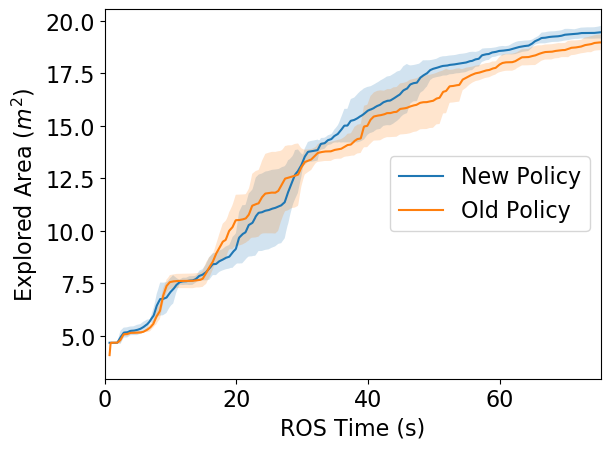

In [12]:

n_simulations = 5
t_list_new = []
map_list_new = [] 

cell_size = 0.05 

discr = 1000
new_value = np.zeros((n_simulations, discr))

# Get New Policy Data
for i in range(1,n_simulations+1):
    folder = path+'/new_policy/sim_'+str(i)
    with open(folder+'/t.pickle', 'rb') as fp:
        t_list_new.append(pickle.load(fp))
    with open(folder+'/map.pickle', 'rb') as fp:
        map_list_new.append(pickle.load(fp))

t_stop_new = min([l[-1] for l in t_list_new])
t_min_new  = max([l[0] for l in t_list_new])

t_list_old = []
map_list_old = [] 
# Get New Policy Data
for i in range(1,n_simulations+1):
    folder = path+'/old_policy/sim_'+str(i)
    with open(folder+'/t.pickle', 'rb') as fp:
        t_list_old.append(pickle.load(fp))
    with open(folder+'/map.pickle', 'rb') as fp:
        map_list_old.append(pickle.load(fp))

t_stop_old = min([l[-1] for l in t_list_old])
t_min_old =  max([l[0]  for l in t_list_old])

t_min = max(t_min_new, t_min_old); t_stop = min(t_stop_new, t_stop_old)

xnew = np.linspace(t_min, t_stop, discr)
xold = np.linspace(t_min, t_stop, discr)
 
# To Matrices
for i in range(n_simulations):
    t   = t_list_new[i]
    map = map_list_new[i]
    f = sp.interpolate.interp1d(t,map)
    map_new = f(xnew)
    new_value[i,:] = map_new * (cell_size**2)
new_mean = np.mean(new_value, axis=0)
new_std  = np.std( new_value, axis=0)

old_value = np.zeros((n_simulations, discr))
for i in range(n_simulations):
    t = t_list_old[i]
    map = map_list_old[i]
    f = sp.interpolate.interp1d(t,map)
    map_new = f(xold)
    old_value[i,:] = map_new * (cell_size**2)
    
old_mean = np.mean(old_value, axis=0)
old_std  = np.std( old_value, axis=0)


plt.plot(xnew, new_mean, label='New Policy')
plt.fill_between(xnew, new_mean-new_std, new_mean+new_std, alpha=0.2)
plt.plot(xold, old_mean, label='Old Policy')
plt.fill_between(xold, old_mean-old_std, old_mean+old_std, alpha=0.2)
plt.xlim(left=0,right=t_stop)
plt.xlabel("ROS Time (s)")
plt.ylabel(r"Explored Area ($m^2$)")
plt.legend(loc='center right')